### Quantum Circuits
- Ordered sequence of **States, Gates and Measurements**
- The components may be also be conditioned on or use data from real time classical computation
- **Universal** gate set is a set which will be able to approximate arbitrarily well any quantum unitary transformation

In [1]:
from qiskit import * 
from qiskit.compiler import assemble 

### Four main components
- **Initialization** - init the states of the qubits 
- **Gates** - apply gates on the qubits to perform computation (manipulates the states of the qubits)
- **Measurements** - collapse the qubits using a particular basis ( stored in classical bits )
- **Classically conditioned gates** - gates being applied on the classical results that we have stored

<img src='quantum_circ.png'>

### Need for classical parts
- While a universal quantum computer can do anything any classical computer can, we often add classical parts to our quantum circuits because quantum states are **fragile**.
- Classical computers are great at storage and thus provide an advantage to the memory requirements needed in a quantum algorithm.



## Quantum Register
- Create a new **QuantumRegister** instance
- Args - 
    - **size** - the size of the register
    - **name** - the name of the register
    - **bits** - a list of Bit() instances used to instantiate
    
### NOTES
- while applying gates like - qc.h() you may use qr[i:j] for the gate to be applied to the QuantumRegister qr's indices [i,j)
- Also if you are making a circuit with a QR, you would need to specify a CR too - QuantumCircuit(qr,3) does **NOT** make a QuantumCircuit() with qr as QuantumRegister and 3 classical bits

In [5]:
b1 = Aer.get_backend('aer_simulator_statevector')
backend =  Aer.get_backend('aer_simulator')
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

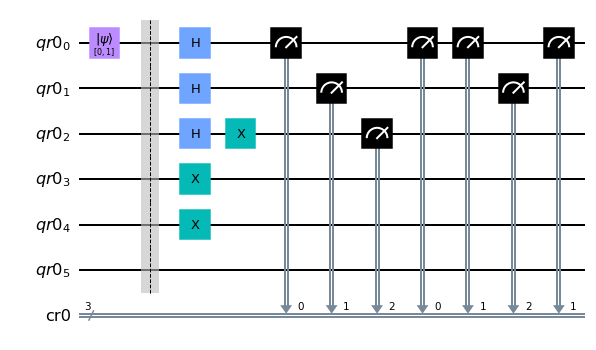

In [13]:
qr = QuantumRegister(name = 'qr0',size = 6)
cr = ClassicalRegister(name= 'cr0',size = 3)
qc = QuantumCircuit(qr,cr)
qc.initialize([0,1],qr[0])
qc.barrier()

#positive indices
qc.h(qr[0:3])
#negative indices
qc.x(qr[-4:-1])

# this is cool 
qc.measure(qr[0:3],[0,1,2])
# can also do
qc.measure([qr[0]],[cr[0]])
# can also say
qc.measure(qr[0],cr[1])
#or something like
qc.measure([0,1],[1,2])
# or 
# note that the barrier operation introduced in the measure all function
# qc.measure_all()
qc.draw('mpl')

In [16]:
res = execute(qc, backend = Aer.get_backend('qasm_simulator')).result()
print(res)
print(res.get_counts())

Result(backend_name='qasm_simulator', backend_version='0.8.2', qobj_id='5fc9e9ad-5012-4eea-b06f-e8fe7feae4b4', job_id='e85a4e94-9be3-48fd-ab7d-dd6b318b9f54', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x3': 254, '0x7': 231, '0x0': 274, '0x4': 265}), header=QobjExperimentHeader(clbit_labels=[['cr0', 0], ['cr0', 1], ['cr0', 2]], creg_sizes=[['cr0', 3]], global_phase=0.0, memory_slots=3, metadata=None, n_qubits=6, name='circuit-129', qreg_sizes=[['qr0', 6]], qubit_labels=[['qr0', 0], ['qr0', 1], ['qr0', 2], ['qr0', 3], ['qr0', 4], ['qr0', 5]]), status=DONE, seed_simulator=3236306586, metadata={'method': 'statevector', 'measure_sampling': True, 'parallel_state_update': 8, 'parallel_shots': 1, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_qubits': 5, 'applied': False}}, time_taken=0.0044355)], date=2021-07-25T22:41:07.636892, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator',

In [15]:
res = execute(qc, backend = backend).result()
print(res)
print(res.get_counts())

Result(backend_name='aer_simulator', backend_version='0.8.2', qobj_id='8115cf5f-4796-4e41-be9f-ba002693a1ea', job_id='bf5a0d4a-c744-4e4b-a410-29f41eb29a68', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x7': 249, '0x3': 249, '0x4': 238, '0x0': 288}), header=QobjExperimentHeader(clbit_labels=[['cr0', 0], ['cr0', 1], ['cr0', 2]], creg_sizes=[['cr0', 3]], global_phase=0.0, memory_slots=3, metadata=None, n_qubits=6, name='circuit-129', qreg_sizes=[['qr0', 6]], qubit_labels=[['qr0', 0], ['qr0', 1], ['qr0', 2], ['qr0', 3], ['qr0', 4], ['qr0', 5]]), status=DONE, seed_simulator=2561883344, metadata={'method': 'statevector', 'device': 'CPU', 'measure_sampling': True, 'parallel_state_update': 8, 'parallel_shots': 1, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_qubits': 5, 'applied': False}}, time_taken=0.0037231)], date=2021-07-25T22:40:21.406201, status=COMPLETED, status=QobjHeader(backend_name='

In [17]:
qr[3:4]

[Qubit(QuantumRegister(6, 'qr0'), 3)]

## qiskit.circuit.Gate
 - A unitary gate class in qiskit
 

In [4]:
from qiskit.circuit import Gate

In [12]:
gate = Gate(name = 'my_phase_gate', num_qubits=1,params = [0.2,12,4242,22,23])

In [18]:
gate.definition = [[0,1],[1,0]]

## Visualizations
- Quantum cicruits can also be <font color='orange'>**printed**</font>
- Also, quantum circuits have three major drawing methods - 
    - Matplotlib
    - Text 
    - Latex

In [8]:
from qiskit.circuit.random import random_circuit 
from qiskit.visualization import circuit_drawer

In [36]:
qc = random_circuit(num_qubits=3,depth=3,measure=True)
print(qc)

               ┌───┐                   ┌─────────────┐┌─┐      
q_0: ──────────┤ X ├────────────■──────┤ RZ(0.65439) ├┤M├──────
               └─┬─┘            │ ┌───┐└──────┬──────┘└╥┘┌─┐   
q_1: ────────────■──────────────X─┤ H ├───────┼────────╫─┤M├───
     ┌────────────────────────┐ │ └───┘       │        ║ └╥┘┌─┐
q_2: ┤ U3(1.0392,4.2405,1.65) ├─X─────────────■────────╫──╫─┤M├
     └────────────────────────┘                        ║  ║ └╥┘
c: 3/══════════════════════════════════════════════════╩══╩══╩═
                                                       0  1  2 


- The draw function actually returns different objects : 
    - TextDrawer for text
    - matplotlib.Figure for mpl 
    - PIL.Image for latex 
- draw function also has a **filename** to save the circuit
- draw function has many kwargs such as **reverse_bits**(literally reverse the bit order and the gates too) and **plot_barriers**(whether or not to display the barriers)

Normal drawing


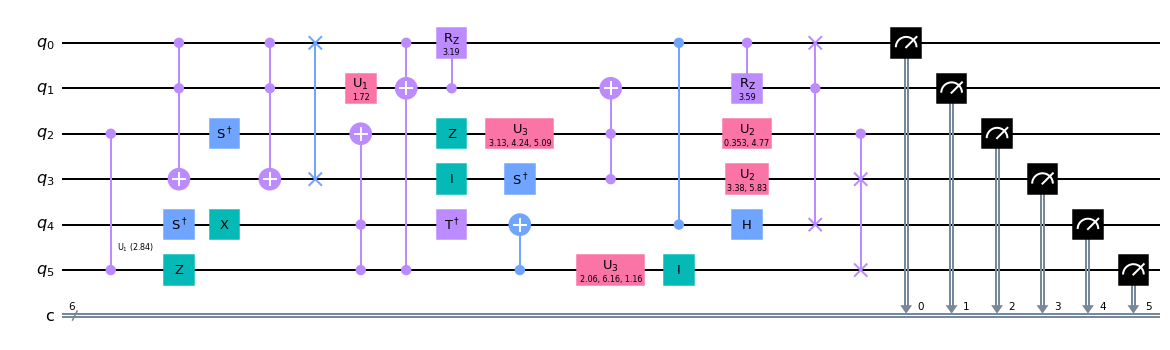

In [28]:
qc = random_circuit(num_qubits= 6, depth = 8, measure= True)
print("Normal drawing")
qc.draw('mpl')

Reversing the bits


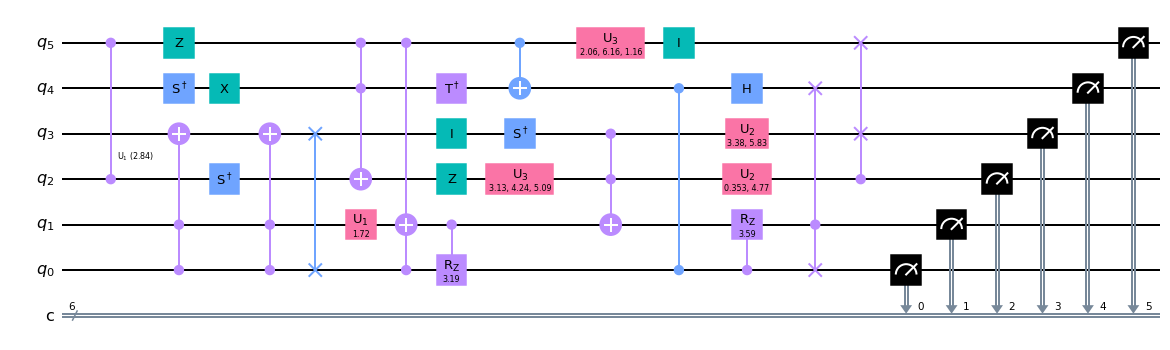

In [29]:
print("Reversing the bits")
qc.draw('mpl',reverse_bits=True)

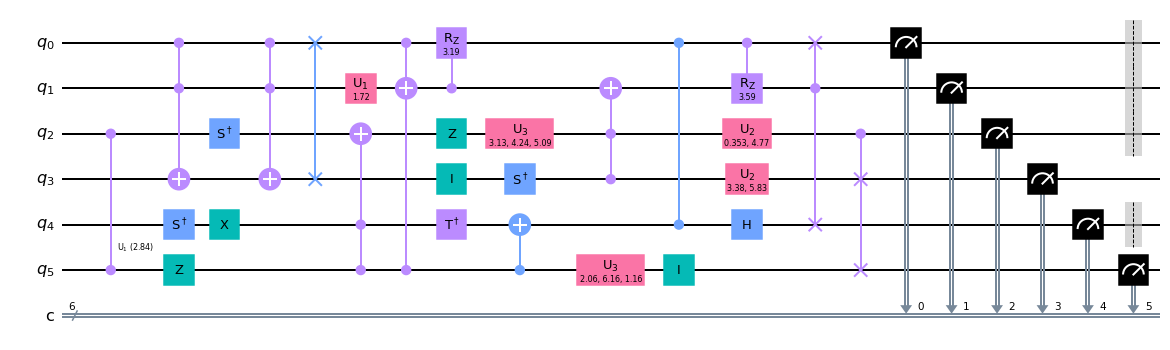

In [30]:
# introducing barriers 
x = [ np.random.randint(6) for i in range(4)] 
qc.barrier(x)
qc.draw('mpl')

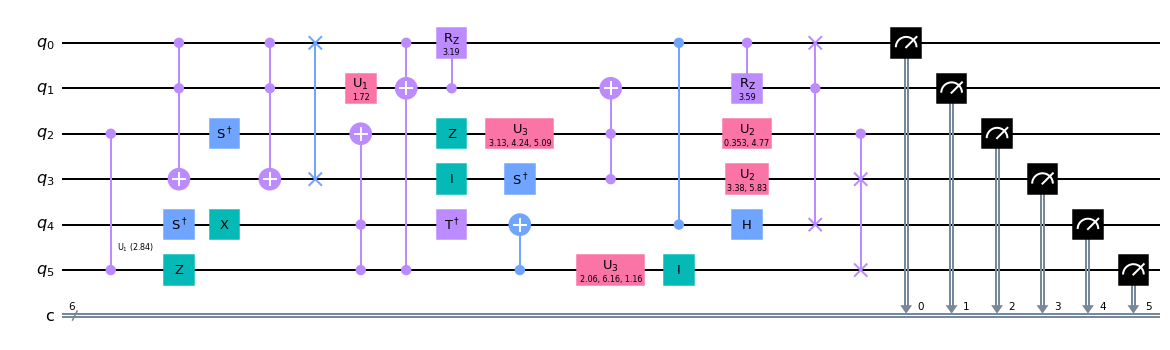

In [32]:
qc.draw('mpl',plot_barriers=False)

- Can also change the style ^.^
- Pretty coollllll!!!


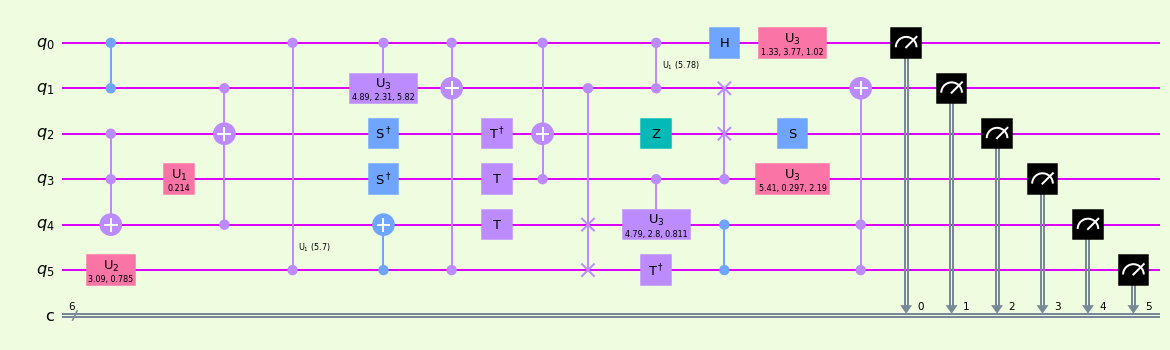

In [67]:
qc.draw('mpl',style = {'fontsize':13,'linecolor':'#dd00ff','backgroundcolor':'#eefddf'})

### using circuit_drawer() function
-  The function behaves identically to the **circuit.draw()** method, except that it **takes in a circuit object as required argument.**
- This function is then used as an independent method instead of being called on a **QuantumCircuit** instance

In [26]:
qc = random_circuit(num_qubits=4, depth = 4, measure = True)
fig = circuit_drawer(qc,output='mpl')

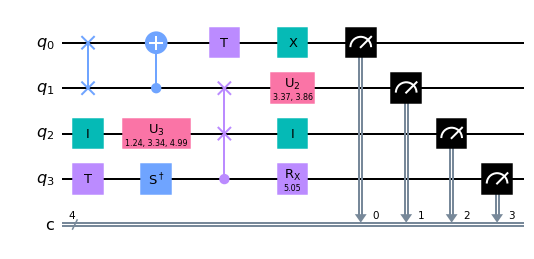

In [27]:
fig # nice, circuit_drawer also returns a figure in matplotlib 

## Depth
- qiskit <font color = 'orange'>does **not** consider **barrier** in depth calculation</font>
- qiskit <font color = 'green'> **does** consider **measurement** in depth calculation</font>

In [69]:
qc = random_circuit(num_qubits=3,depth=7,measure=True)

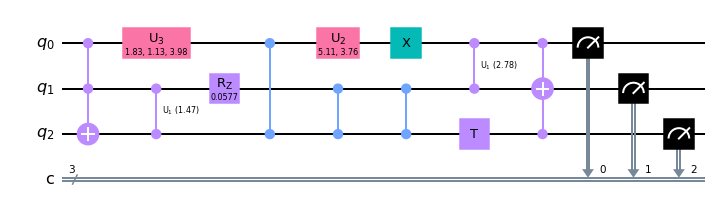

In [70]:
qc.draw('mpl')

In [72]:
print("The depth is :",qc.depth())
print("Depth is 8 because qiskit also CONSIDER'S MEASUREMENTS AS PART OF THE DEPTH")

The depth is : 8
Depth is 8 because qiskit also CONSIDER'S MEASUREMENTS AS PART OF THE DEPTH


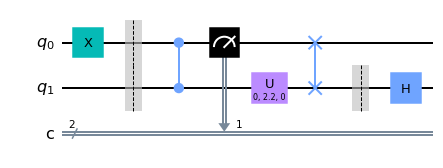

In [17]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.barrier()
qc.cz(1,0)
qc.measure(0,1)
qc.u(0,2.2,0,1)
qc.swap(0,1)
qc.barrier(1)
qc.h(1)
# qc.measure_all()
qc.draw('mpl')

In [18]:
'''
1,0
2,2
2,3
4,4
4,5
depth -> 5 if barrier is not considered
'''


print("Depth :",qc.depth())
print("This means barrier is NOT CONSIDERED WHILE MEASURING THE DEPTH")
print("Even if measurement is present, you need to follow the method given to find out the depth not just blindly add one")

Depth : 5
This means barrier is NOT CONSIDERED WHILE MEASURING THE DEPTH
Even if measurement is present, you need to follow the method given to find out the depth not just blindly add one
